In [1]:
import json
import pandas as pd
import numpy as np

# import regular expression module
import re

In [2]:
file_dir = 'Resources/'

with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)
len(wiki_movies_raw)

7311

In [3]:
# first 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [4]:
# last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [5]:
# some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [6]:
movies_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv') # low_memory=False  removes the warning
ratings = pd.read_csv(f'{file_dir}ratings.csv')

C:\Anaconda3\envs\databootcamp\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
ratings.sample(n=5)  # sample random rows

,userId,movieId,rating,timestamp
23954890,248733,69757,3.5,1500998068
2945207,30694,588,4.0,974781194
9205624,95065,928,5.0,1033433872
15827526,164613,6535,1.5,1436714623
20845336,216646,2316,2.0,1008954529


In [9]:
# clean wikipedia data

wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(wiki_movies_df.columns.tolist())
#wiki_movies_df.columns.tolist()


193

In [11]:
# filter data using list comprehensions: [expression for element in source_list if filter_expression]

wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [12]:
wiki_movies_df = pd.DataFrame(wiki_movies)
len(wiki_movies_df.columns.tolist())

75

In [13]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [14]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['imdb_link']
# sorted(wiki_movies_df.columns.tolist())

6834    https://www.imdb.com/title/tt7048622/
7058    https://www.imdb.com/title/tt8267604/
Name: imdb_link, dtype: object

In [15]:
# define function to clean wiki_movies

def clean_movie(movie):
    # make a non-destructive copy of movie
    movie = dict(movie) # movie is a dict
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # define a function inside the existing function
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:  # movie is visible inside the function
            movie[new_name] = movie.pop(old_name) # pop(key) returns the value of the 'key'
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    

    
    return movie

In [16]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')  # search for a string pattern inside the string
                                                                          # r'xx\x' keep \ as part of string
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [17]:
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Directed by', 2],
 ['Produced by', 360],
 ['Screenplay by', 4726],
 ['Story by', 6037],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Music by', 593],
 ['Cinematography', 691],
 ['Edited by', 694],
 ['Productioncompany ', 2532],
 ['Distributed by', 495],
 ['Release date', 193],
 ['Running time', 141],
 ['Country', 388],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Written by', 2490],
 ['Genre', 6923],
 ['Theme music composer', 6966],
 ['Country of origin', 6881],
 ['Original language(s)', 6875],
 ['Producer(s)', 6877],
 ['Editor(s)', 6887],
 ['Production company(s)', 6902],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Productioncompanies ', 6310],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Distributor', 6895],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Composer(s)', 7025],
 ['Crea

In [18]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < 0.9 * len(wiki_movies_df)]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
sorted(wiki_movies_df.columns.tolist())

['Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Country',
 'Directed by',
 'Distributed by',
 'Edited by',
 'Language',
 'Music by',
 'Produced by',
 'Productioncompanies ',
 'Productioncompany ',
 'Release date',
 'Running time',
 'Screenplay by',
 'Starring',
 'Story by',
 'Written by',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

In [19]:
# convert data types
wiki_movies_df.dtypes

url                     object
year                     int64
imdb_link               object
title                   object
Directed by             object
Produced by             object
Screenplay by           object
Story by                object
Based on                object
Starring                object
Music by                object
Cinematography          object
Edited by               object
Productioncompany       object
Distributed by          object
Release date            object
Running time            object
Country                 object
Language                object
Budget                  object
Box office              object
Written by              object
Productioncompanies     object
imdb_id                 object
dtype: object

In [20]:
box_office = wiki_movies_df['Box office'].dropna()

In [21]:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [22]:
# alternatively using lambda function
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [23]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x)==list else x)
box_office.sample(20)

3314                                     $182.3 million
512                                        $1.3 million
6727                                      $65.1 million
3786                                     $162.9 million
1048                                      $38.6 million
6659                                            $68,883
4627                                     $170.8 million
4949                                        $29,010,817
6490                                       $9.1 million
841                                 $1 million [1] (US)
4930    $36.1 million [1] $8,610,119 (US DVD sales) [3]
6613                                     $334.9 million
5217                                     $167.8 million
3354                                        $44,350,926
305                                       $28.7 million
5325                                       $150 million
4942                                       $4.6 million
40                                             $

In [24]:
form_one = '\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum() # na=False  - false for not matching items

3896

In [32]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum() # na=False  - false for not matching items

1544

In [34]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)


In [35]:
box_office[(~matches_form_one) & (~matches_form_two)] # list box_office format not matching both

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [42]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [43]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)   # Note: 3 types of dashes

In [45]:
box_office.str.extract(f'({form_one}|{form_two})')  # catching groups using ()

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [49]:
def parse_dollars(s):
    # if s is not a string, return nan
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        
        # convert to float and multiply by a million
        value = float(s) * 1e6
        
        # return value
        return value
    
    # if input is of the form
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        
        # convert to float and multiply by a billion
        value = float(s) * 1e9
        
        # return value
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and comma
        s = re.sub('\$|,', '', s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value
    
    # otherwise, return NaN
    else:
        return np.nan

In [51]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})')[0].apply(parse_dollars)
wiki_movies_df['box_office'].head(10)

0    21400000.0
1     2700000.0
2    57718089.0
3     7331647.0
4     6939946.0
5           NaN
6           NaN
7           NaN
8           NaN
9      855810.0
Name: box_office, dtype: float64

In [54]:
# wiki_movies_df.columns.tolist()

# drop the original 'Box office' column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [56]:
len(wiki_movies_df.columns.tolist())

24

In [57]:
# parse the budget data
budget = wiki_movies_df['Budget'].dropna()

In [58]:
# convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x)==list else x)

In [59]:
# remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [64]:
budget.sample(20)

2563    $4.5 million
2887     $35 million
6863        $350,000
129       $6 million
4605    $3.4 million
5173      $3 million
5175    $200 million
1416     $30 million
6098      $7 million
3117     $40 million
6189      $1 million
6503     $15 million
2091     $15,000,000
6680    $320 million
1291     $21 million
3681     $20 million
3690     $53 million
3449    $107 million
1740      $8,000,000
4229     $40 million
Name: Budget, dtype: object

In [78]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget = budget.str.replace(r'\[\d+\]\s*', '')
print(len(budget[~matches_form_one & ~matches_form_two]))
budget[~matches_form_one & ~matches_form_two]

32


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [82]:
wiki_movies_df['Budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['Budget'].isnull().sum()

2327

In [85]:
wiki_movies_df.drop('budget',axis=1, inplace=True)

KeyError: "['budget'] not found in axis"

In [86]:
wiki_movies_df['Budget'].isnull().sum()

2327

In [88]:
sorted(wiki_movies_df.columns.tolist())

['Based on',
 'Budget',
 'Cinematography',
 'Country',
 'Directed by',
 'Distributed by',
 'Edited by',
 'Language',
 'Music by',
 'Produced by',
 'Productioncompanies ',
 'Productioncompany ',
 'Release date',
 'Running time',
 'Screenplay by',
 'Starring',
 'Story by',
 'Written by',
 'box_office',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

In [91]:
# parse release date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x)==list else x)
release_date.sample(20)

4109    March 20, 2006 ( 2006-03-20 ) ( New York City ...
3260    May 14, 2003 ( 2003-05-14 ) ( Hollywood ) May ...
3380    October 26, 2003 ( 2003-10-26 ) ( HIFF ) Augus...
4721    January 4, 2008 ( 2008-01-04 ) (United States)...
6796    1 September 2017 ( 2017-09-01 ) ( Telluride ) ...
595                      February 14, 1992 ( 1992-02-14 )
1045                        April 29, 1994 ( 1994-04-29 )
904                                         1996 ( 1996 )
4978                      February 6, 2009 ( 2009-02-06 )
6989                       August 24, 2018 ( 2018-08-24 )
5360                         June 17, 2011 ( 2011-06-17 )
2896                      January 20, 2001 ( 2001-01-20 )
6468    February 15, 2016 ( 2016-02-15 ) ( Dallas ) Fe...
6947    January 20, 2018 ( 2018-01-20 ) ( Sundance ) J...
1892                                        1997 ( 1997 )
614                      December 23, 1992 ( 1992-12-23 )
1186                        March 17, 1995 ( 1995-03-17 )
5796    Septem

In [93]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d' # matches yyyy-mm-dd and yyyy/mm/dd
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [96]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df['release_date'].sample(20)

4449   2007-08-28
13     1990-12-20
5561   2011-10-08
4779   2008-08-22
3782   2005-01-01
514    1992-10-02
6927   2017-02-01
3781   2005-11-23
4701   2008-06-30
1604   1996-05-01
5321   2011-04-23
4275   2005-09-12
2772   2000-04-28
5872   2013-06-14
5959   2013-05-28
2226   1998-02-27
1030   1947-06-04
2869   2001-03-23
3859   2005-08-22
6822   2017-09-01
Name: release_date, dtype: datetime64[ns]

In [98]:
# parse running time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x)==list else x)
running_time.sample(20)

6450                               144 minutes
3210                                98 minutes
304                                107 minutes
1679                               150 minutes
3148                                96 minutes
5867                               113 minutes
6049                                90 minutes
1867    88 minutes 75 minutes (Edited version)
1601                                   79 mins
4800                               104 minutes
3784                               128 minutes
2229                                   87 min.
1504                                36 minutes
2247                                71 minutes
3200                                90 minutes
6703                                90 minutes
4547                                85 minutes
3584                               105 minutes
586                                110 minutes
4498                               102 minutes
Name: Running time, dtype: object

In [100]:
running_time.count()

6892

In [101]:
running_time[running_time.str.contains(r'^\d*\sminutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 365, dtype: object

In [105]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running time, dtype: object

In [110]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract.sample(20) # type is string

,0,1,2
3642,NaN,NaN,99
1587,NaN,NaN,80
6570,NaN,NaN,128
4616,NaN,NaN,96
4169,NaN,NaN,92
914,NaN,NaN,102
3688,NaN,NaN,140
6425,NaN,NaN,142
1999,NaN,NaN,93
2061,NaN,NaN,88


In [112]:
# 'coerce' method sets empty strings into Not a Number (NaN), then 'fillna()' change NaN to 0
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract.sample(20)

,0,1,2
621,0.0,0.0,101.0
5777,0.0,0.0,90.0
786,0.0,0.0,120.0
4383,0.0,0.0,90.0
909,0.0,0.0,97.0
5299,0.0,0.0,109.0
5229,0.0,0.0,102.0
4975,0.0,0.0,98.0
7067,0.0,0.0,114.0
5017,0.0,0.0,107.0


In [122]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2]==0 else row[2], axis=1) # axis=1 -> columns
wiki_movies_df['running_time'].sample(20)

3673    118.0
5624    150.0
149      98.0
226      93.0
7029    121.0
2396    118.0
5409    121.0
6136    130.0
3595    100.0
87       95.0
6341     92.0
5542    102.0
875      39.0
4944     90.0
5298    113.0
3099     98.0
3762    105.0
103     136.0
4951    103.0
3748    108.0
Name: running_time, dtype: float64

In [119]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)  # axis=1 -> columns

KeyError: "['Running time'] not found in axis"

In [125]:
# clean the Kaggle data
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [132]:
movies_metadata['id'].sample(10)

1627       9714
19603     38280
12136     13066
13649      6461
21212     36796
4898      24166
14631     20504
22818    418029
37646    292010
28623     97607
Name: id, dtype: object

In [134]:
movies_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [138]:
# exam the three movies not having True or False
movies_metadata[~movies_metadata['adult'].isin(['True','False'])]
# movies_metadata['adult'].value_counts()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# remove adult = True entries, keeping only adult = False entries
movies_metadata = movies_metadata[movies_metadata['adult']=='False'].drop('adult', axis='columns')

KeyError: 'adult'

In [141]:
# exam 'video' column
movies_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [142]:
movies_metadata['video'] = movies_metadata['video'] == 'True'

In [145]:
# convert 'budget', 'id', and 'popularity' to numeric
movies_metadata['budget'] = movies_metadata['budget'].astype(int)
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='raise') # raise error
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], errors='raise')

In [146]:
# convert 'release_date' to datetime
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='raise')

In [149]:
# exam 'rating'
import os
ratings_file = os.path.join('Resources', 'ratings.csv')
ratings = pd.read_csv(ratings_file)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [150]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [156]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s') # unix timestamp is the seconds from 1/1/1970

In [159]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].describe()

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

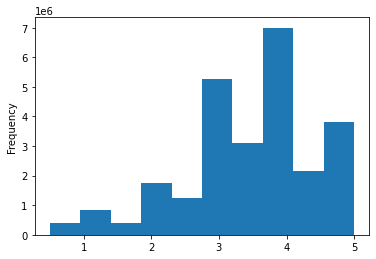

In [160]:
ratings['rating'].plot(kind='hist')